In [1]:
# Load Packages

import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.simplefilter("ignore")

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zachg\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Load data

tweets_df = pd.read_csv("vaccination_all_tweets.csv")
tweets_df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14688,1362771012295815172,Sputnik V,"Moscow, Russia",Sputnik V is the world’s first registered COVI...,2020-08-11 09:12:38,124471,141,355,False,2021-02-19 14:28:23,Italian opera singer Chiuri gets vaccinated wi...,['SputnikV'],Twitter Web App,44,139,False
14689,1362769025273651201,M a r t í,США 🇺🇸,"El meu twitter en català, des dels Estats Unit...",2014-02-09 03:41:26,61,112,31,False,2021-02-19 14:20:29,US diplomats in #Russia have asked to receive ...,"['Russia', 'SputnikV']",Twitter Web App,0,0,False
14690,1362768961914372096,AGP Limited,"Karachi, Pakistan",AGP believes in making a difference...!! \nWe ...,2018-02-01 04:24:40,116,2,13,False,2021-02-19 14:20:14,AGP Limited has conducted an exclusive session...,NaN,Twitter Web App,2,2,False
14691,1362765451659534337,Danil Bochkov / 博奇科夫,"Moscow, Russia",IR & China expert @Russian_Council | Alumni at...,2013-07-27 07:03:28,463,469,2555,False,2021-02-19 14:06:17,"My latest for @CNN: ""It is always easier to de...",NaN,Twitter for iPhone,0,1,False


In [4]:
# Preview the data

print(f"data shape: {tweets_df.shape}")

data shape: (14693, 16)


In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14693 entries, 0 to 14692
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                14693 non-null  int64 
 1   user_name         14693 non-null  object
 2   user_location     11324 non-null  object
 3   user_description  13705 non-null  object
 4   user_created      14693 non-null  object
 5   user_followers    14693 non-null  int64 
 6   user_friends      14693 non-null  int64 
 7   user_favourites   14693 non-null  int64 
 8   user_verified     14693 non-null  bool  
 9   date              14693 non-null  object
 10  text              14693 non-null  object
 11  hashtags          11564 non-null  object
 12  source            14691 non-null  object
 13  retweets          14693 non-null  int64 
 14  favorites         14693 non-null  int64 
 15  is_retweet        14693 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.6+ MB


In [6]:
tweets_df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,1.469300e+04,1.469300e+04,14693.000000,1.469300e+04,14693.000000,14693.000000
mean,1.356652e+18,1.009969e+05,1432.750017,1.410269e+04,2.557817,10.220445
std,8.184295e+15,8.225279e+05,7923.907977,4.179880e+04,25.997702,74.176631
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.350345e+18,1.320000e+02,149.000000,3.140000e+02,0.000000,0.000000
50%,1.359876e+18,6.350000e+02,438.000000,1.908000e+03,0.000000,1.000000
75%,1.362884e+18,3.167000e+03,1255.000000,1.018500e+04,1.000000,4.000000
max,1.365595e+18,1.481592e+07,380370.000000,1.205878e+06,2247.000000,3090.000000


In [7]:
tweets_df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14688,1362771012295815172,Sputnik V,"Moscow, Russia",Sputnik V is the world’s first registered COVI...,2020-08-11 09:12:38,124471,141,355,False,2021-02-19 14:28:23,Italian opera singer Chiuri gets vaccinated wi...,['SputnikV'],Twitter Web App,44,139,False
14689,1362769025273651201,M a r t í,США 🇺🇸,"El meu twitter en català, des dels Estats Unit...",2014-02-09 03:41:26,61,112,31,False,2021-02-19 14:20:29,US diplomats in #Russia have asked to receive ...,"['Russia', 'SputnikV']",Twitter Web App,0,0,False
14690,1362768961914372096,AGP Limited,"Karachi, Pakistan",AGP believes in making a difference...!! \nWe ...,2018-02-01 04:24:40,116,2,13,False,2021-02-19 14:20:14,AGP Limited has conducted an exclusive session...,NaN,Twitter Web App,2,2,False
14691,1362765451659534337,Danil Bochkov / 博奇科夫,"Moscow, Russia",IR & China expert @Russian_Council | Alumni at...,2013-07-27 07:03:28,463,469,2555,False,2021-02-19 14:06:17,"My latest for @CNN: ""It is always easier to de...",NaN,Twitter for iPhone,0,1,False


In [8]:
# Deal w/ missing data

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [9]:
missing_data(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,0,0,3369,988,0,0,0,0,0,0,0,3129,2,0,0,0
Percent,0,0,22.9293,6.72429,0,0,0,0,0,0,0,21.2959,0.0136119,0,0,0
Types,int64,object,object,object,object,int64,int64,int64,bool,object,object,object,object,int64,int64,bool


In [10]:
# Unique values

def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [11]:
unique_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,14693,14693,11324,13705,14693,14693,14693,14693,14693,14693,14693,11564,14691,14693,14693,14693
Uniques,14693,8709,3664,8242,8749,4545,3129,6939,2,14609,14681,6214,103,127,263,1


In [12]:
# Frequent values

def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [13]:
most_frequent_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,14693,14693,11324,13705,14693,14693,14693,14693,14693,14693,14693,11564,14691,14693,14693,14693
Most frequent item,1364449897190027270,Sputnik,India,"Sputnik is a global wire, radio and digital ne...",2009-04-22 12:55:28,1,0,0,False,2021-02-13 00:30:00,#Covid19 Vaccine Rollout Needs Spark Even More...,['PfizerBioNTech'],Twitter Web App,0,0,False
Frequence,1,118,202,118,118,92,132,209,12873,3,5,754,4931,9707,6053,14693
Percent from total,0.007,0.803,1.784,0.861,0.803,0.626,0.898,1.422,87.613,0.02,0.034,6.52,33.565,66.065,41.196,100


In [14]:
# Visualize the distribution of data

def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

In [15]:
tweets_df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14688,1362771012295815172,Sputnik V,"Moscow, Russia",Sputnik V is the world’s first registered COVI...,2020-08-11 09:12:38,124471,141,355,False,2021-02-19 14:28:23,Italian opera singer Chiuri gets vaccinated wi...,['SputnikV'],Twitter Web App,44,139,False
14689,1362769025273651201,M a r t í,США 🇺🇸,"El meu twitter en català, des dels Estats Unit...",2014-02-09 03:41:26,61,112,31,False,2021-02-19 14:20:29,US diplomats in #Russia have asked to receive ...,"['Russia', 'SputnikV']",Twitter Web App,0,0,False
14690,1362768961914372096,AGP Limited,"Karachi, Pakistan",AGP believes in making a difference...!! \nWe ...,2018-02-01 04:24:40,116,2,13,False,2021-02-19 14:20:14,AGP Limited has conducted an exclusive session...,NaN,Twitter Web App,2,2,False
14691,1362765451659534337,Danil Bochkov / 博奇科夫,"Moscow, Russia",IR & China expert @Russian_Council | Alumni at...,2013-07-27 07:03:28,463,469,2555,False,2021-02-19 14:06:17,"My latest for @CNN: ""It is always easier to de...",NaN,Twitter for iPhone,0,1,False


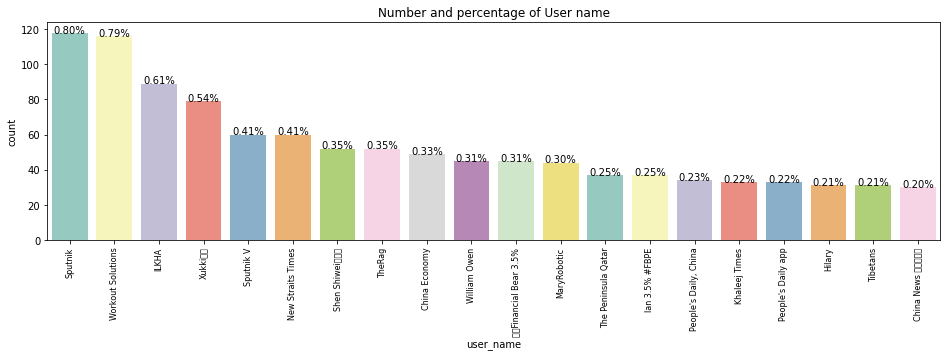

In [16]:
# User names

plot_count("user_name", "User name", tweets_df,4)

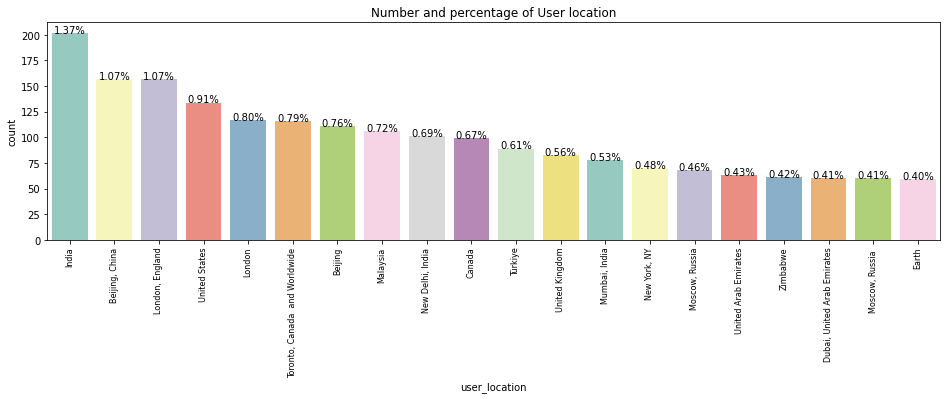

In [17]:
# User location

plot_count("user_location", "User location", tweets_df,4)

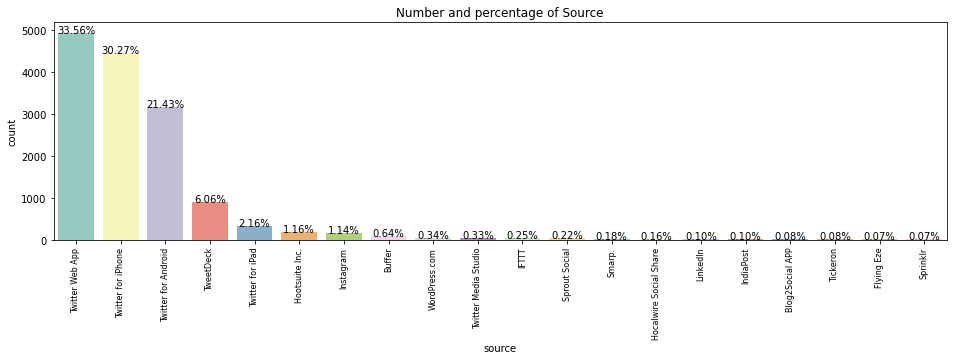

In [18]:
# Tweet source

plot_count("source", "Source", tweets_df,4)

In [19]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [20]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

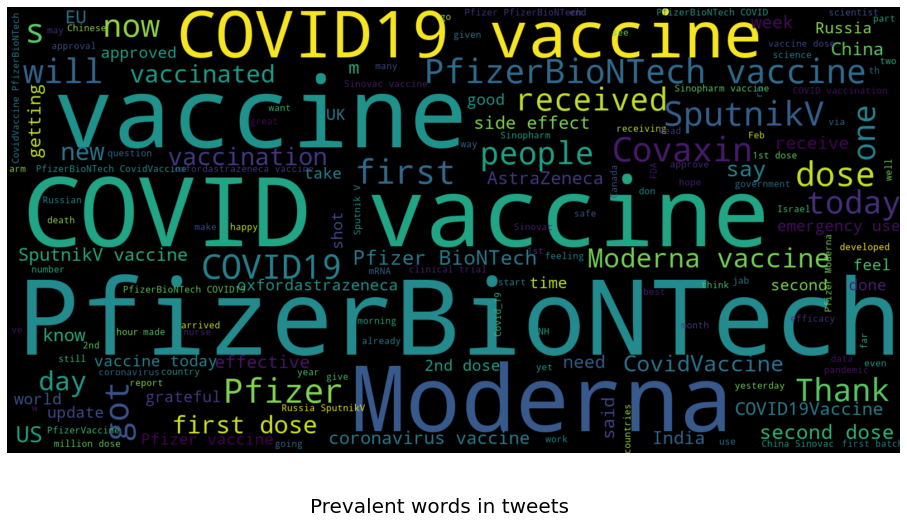

In [21]:
# Frequent word clouds

show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

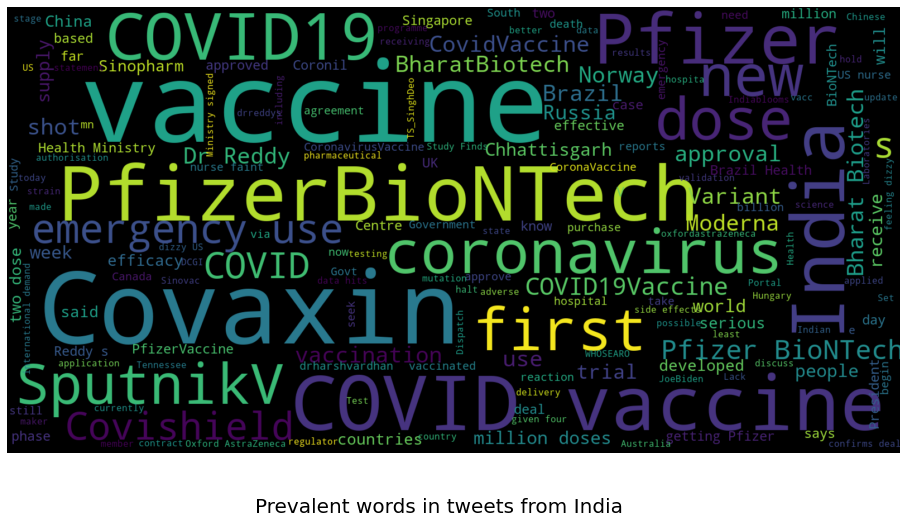

In [22]:
# Prevelant words in tweets - Indian

india_df = tweets_df.loc[tweets_df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

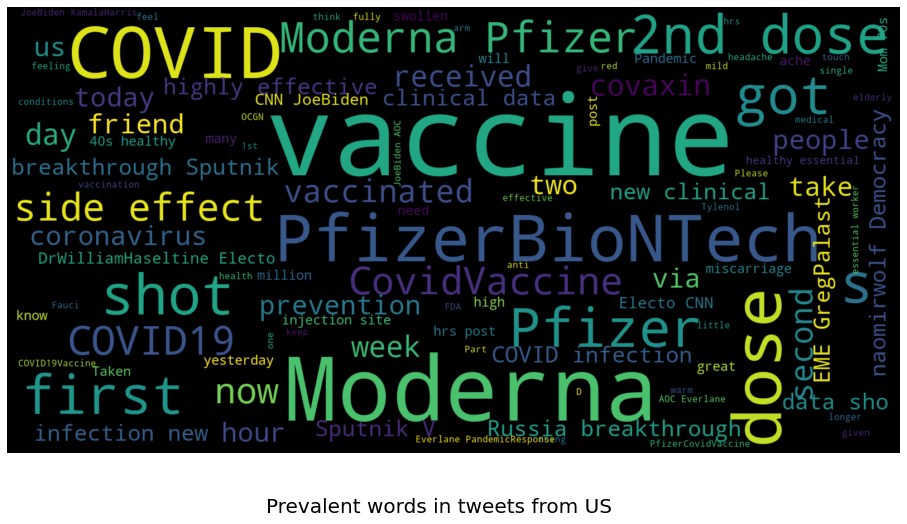

In [23]:
# Prevelant words in tweets - US

us_df = tweets_df.loc[tweets_df.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from US')

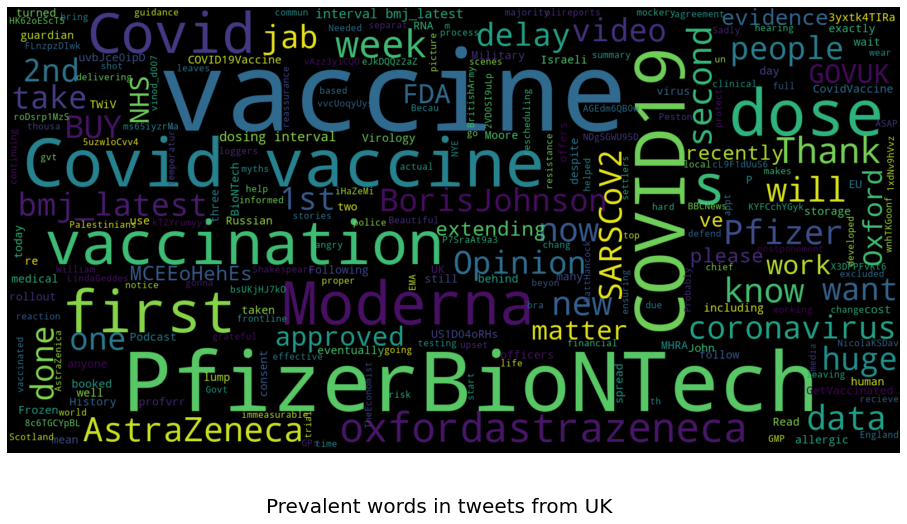

In [24]:
# Prevelant words in tweets - UK

uk_df = tweets_df.loc[tweets_df.user_location=="United Kingdom"]
show_wordcloud(uk_df['text'], title = 'Prevalent words in tweets from UK')

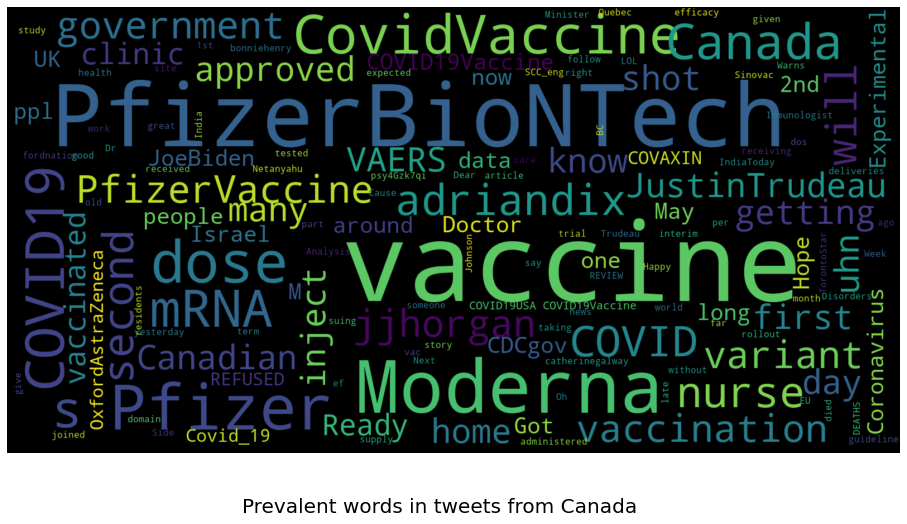

In [25]:
# Prevelant words in tweets - Canada

ca_df = tweets_df.loc[tweets_df.user_location=="Canada"]
show_wordcloud(ca_df['text'], title = 'Prevalent words in tweets from Canada')

In [26]:
# Hashtags Analysis

def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

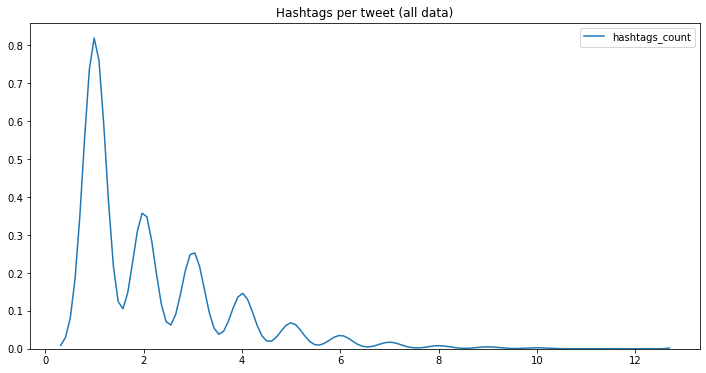

In [27]:
# Plot the hashtags

tweets_df['hashtags'] = tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df['hashtags_count'] = tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df)

In [28]:
tweets_df['hashtags_individual'] = tweets_df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(tweets_df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

There are totally: 5786


In [29]:
tweets_df['hashtags_individual'].head()

0                                 [['PfizerBioNTech']]
1                                           [['None']]
2    [['coronavirus',  'SputnikV',  'AstraZeneca', ...
3                                           [['None']]
4    [['whereareallthesickpeople',  'PfizerBioNTech']]
Name: hashtags_individual, dtype: object

In [30]:
# Extract country from location 


In [31]:
# We load the country list from the additional database we added to this Notebook. We also create a country column in 
# the original dataset.

country_df = pd.read_csv("Country_Codes.csv", engine = 'python')
country_df

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2,Unnamed: 5
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,NaN
...,...,...,...,...,...,...
241,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,NaN
242,Western Sahara,EH,ESH,732,ISO 3166-2:EH,NaN
243,Yemen,YE,YEM,887,ISO 3166-2:YE,NaN
244,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,NaN


In [32]:
country_df.columns = ["country", "alpha2", "alpha3", "numeric", "iso", 'Unnamed']
country_df.head()

,country,alpha2,alpha3,numeric,iso,Unnamed
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,NaN


In [33]:
tweets_df['country'] = tweets_df['user_location']

In [34]:
# Merge the tweets and countries databases
#tweets_df = tweets_df.merge(country_df, on="country")

In [35]:
tweets_df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,hashtags_count,hashtags_individual,country
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,1,[['PfizerBioNTech']],"La Crescenta-Montrose, CA"
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,['None'],Twitter Web App,1,1,False,1,[['None']],"San Francisco, CA"
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,6,"[['coronavirus', 'SputnikV', 'AstraZeneca', ...",Your Bed
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",['None'],Twitter Web App,446,2129,False,1,[['None']],"Vancouver, BC - Canada"
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,2,"[['whereareallthesickpeople', 'PfizerBioNTech']]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14688,1362771012295815172,Sputnik V,"Moscow, Russia",Sputnik V is the world’s first registered COVI...,2020-08-11 09:12:38,124471,141,355,False,2021-02-19 14:28:23,Italian opera singer Chiuri gets vaccinated wi...,['SputnikV'],Twitter Web App,44,139,False,1,[['SputnikV']],"Moscow, Russia"
14689,1362769025273651201,M a r t í,США 🇺🇸,"El meu twitter en català, des dels Estats Unit...",2014-02-09 03:41:26,61,112,31,False,2021-02-19 14:20:29,US diplomats in #Russia have asked to receive ...,"['Russia', 'SputnikV']",Twitter Web App,0,0,False,2,"[['Russia', 'SputnikV']]",США 🇺🇸
14690,1362768961914372096,AGP Limited,"Karachi, Pakistan",AGP believes in making a difference...!! \nWe ...,2018-02-01 04:24:40,116,2,13,False,2021-02-19 14:20:14,AGP Limited has conducted an exclusive session...,['None'],Twitter Web App,2,2,False,1,[['None']],"Karachi, Pakistan"
14691,1362765451659534337,Danil Bochkov / 博奇科夫,"Moscow, Russia",IR & China expert @Russian_Council | Alumni at...,2013-07-27 07:03:28,463,469,2555,False,2021-02-19 14:06:17,"My latest for @CNN: ""It is always easier to de...",['None'],Twitter for iPhone,0,1,False,1,[['None']],"Moscow, Russia"


In [36]:
#tw_add_df = tweets_df.groupby(["country", "iso", "alpha3"])['text'].count().reset_index()
#tw_add_df.columns = ["country", "iso", "alpha3", "tweets"]

KeyError: 'iso'

In [ ]:
#print(f"tweets containing country information: {tw_add_df.tweets.sum()}")
#print(f"tweets containing country information; distinct countries: {tw_add_df.country.shape[0]}")

In [ ]:
# Tweets/country (where country is specified)

#plot_map(tw_add_df, "Tweets per country (where country is specified)")

In [37]:
# Extract date & time features

tweets_df['datedt'] = pd.to_datetime(tweets_df['date'])

In [38]:
tweets_df['year'] = tweets_df['datedt'].dt.year
tweets_df['month'] = tweets_df['datedt'].dt.month
tweets_df['day'] = tweets_df['datedt'].dt.day
tweets_df['dayofweek'] = tweets_df['datedt'].dt.dayofweek
tweets_df['hour'] = tweets_df['datedt'].dt.hour
tweets_df['minute'] = tweets_df['datedt'].dt.minute
tweets_df['dayofyear'] = tweets_df['datedt'].dt.dayofyear
tweets_df['date_only'] = tweets_df['datedt'].dt.date

In [39]:
# Time variation

tweets_agg_df = tweets_df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [40]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

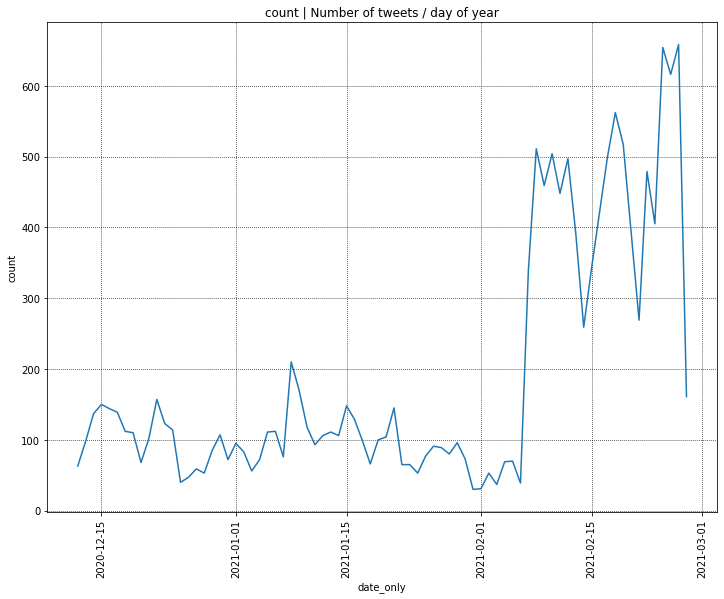

In [41]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

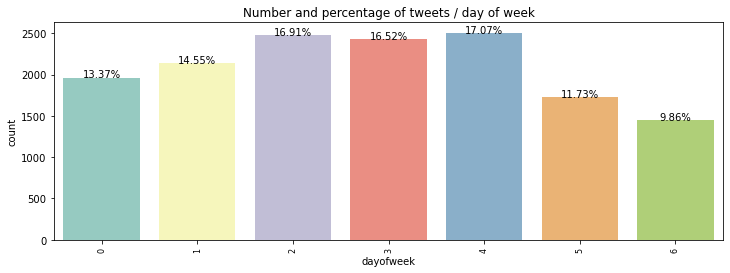

In [42]:
plot_count("dayofweek", "tweets / day of week", tweets_df, size=3, ordered=False)

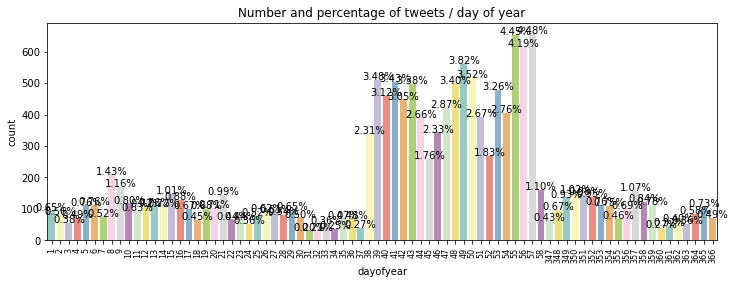

In [43]:
plot_count("dayofyear", "tweets / day of year", tweets_df, size=3, ordered=False)

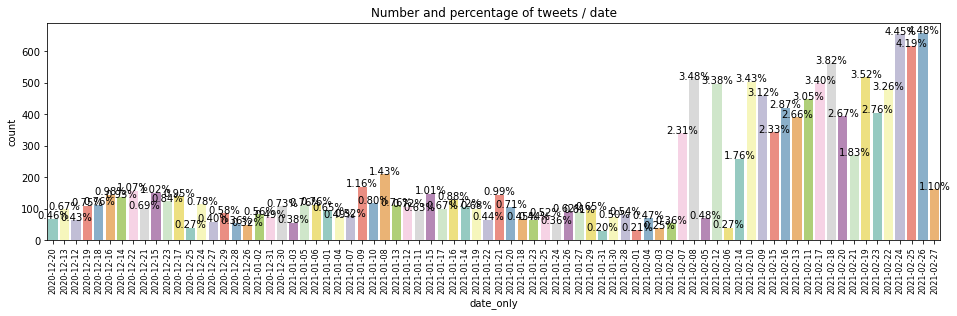

In [44]:
plot_count("date_only", "tweets / date", tweets_df,size=4, ordered=False)

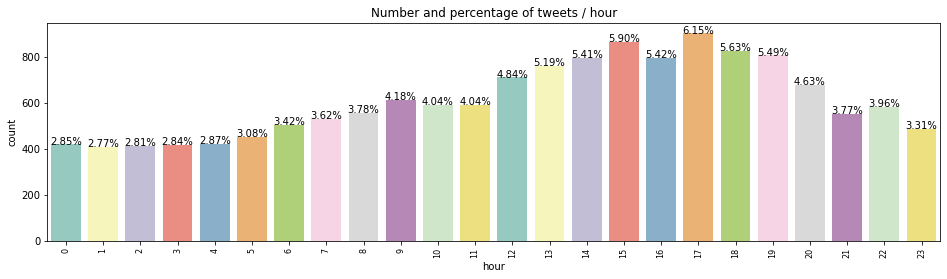

In [45]:
plot_count("hour", "tweets / hour", tweets_df,size=4, ordered=False)

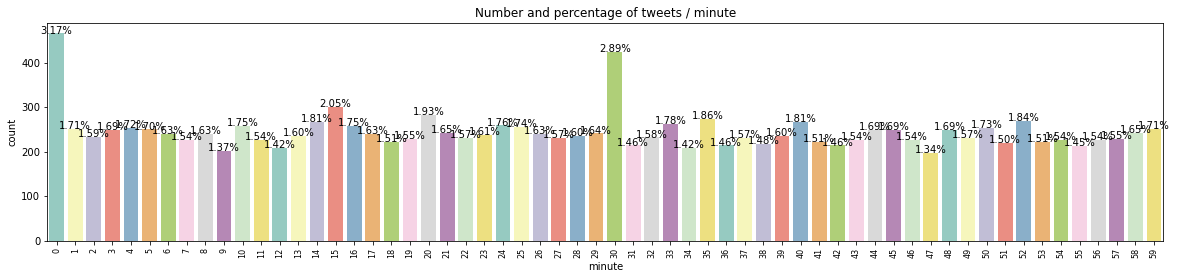

In [46]:
plot_count("minute", "tweets / minute", tweets_df,size=5, ordered=False)

In [47]:
# Sentiment analysis

# borrowed from https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

In [48]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

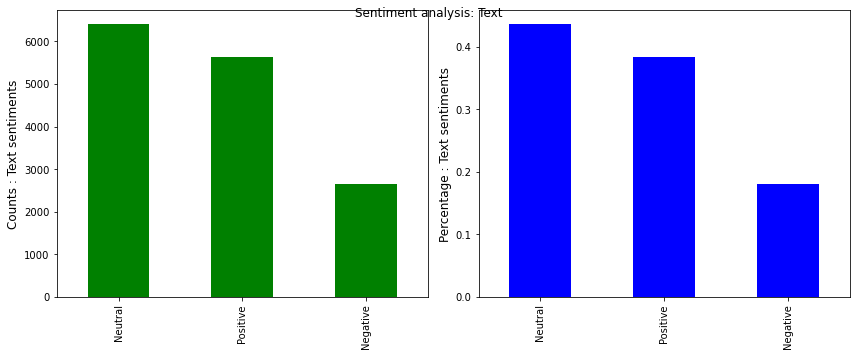

In [49]:
tweets_df['sentiment'] = tweets_df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(tweets_df, 'sentiment', 'Text')

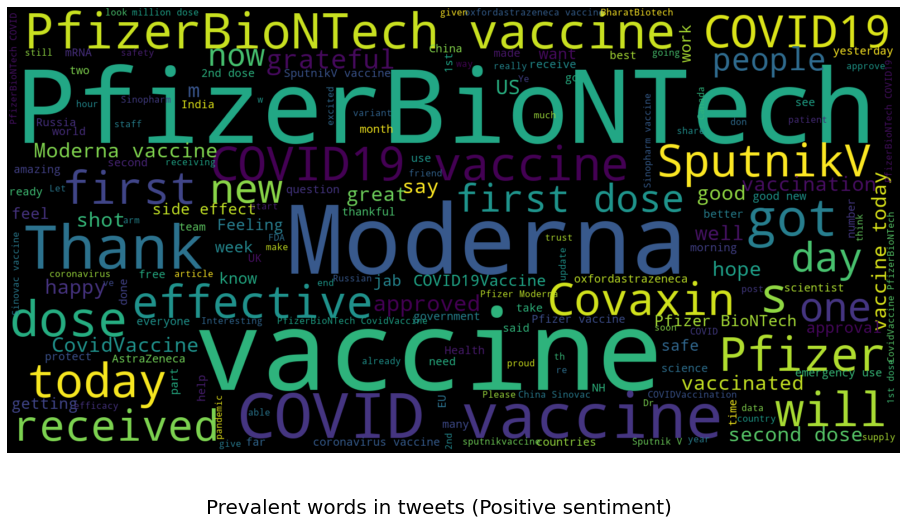

In [50]:
# Prevelant words in Positive tweets

show_wordcloud(tweets_df.loc[tweets_df['sentiment']=='Positive', 'text'], 
               title = 'Prevalent words in tweets (Positive sentiment)')

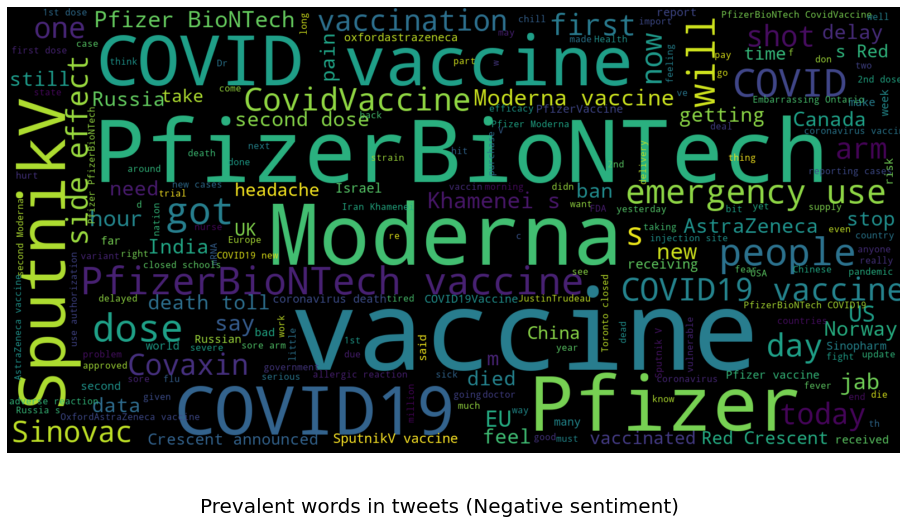

In [51]:
# Prevelant words in Negative tweets

show_wordcloud(tweets_df.loc[tweets_df['sentiment']=='Negative', 'text'], 
               title = 'Prevalent words in tweets (Negative sentiment)')

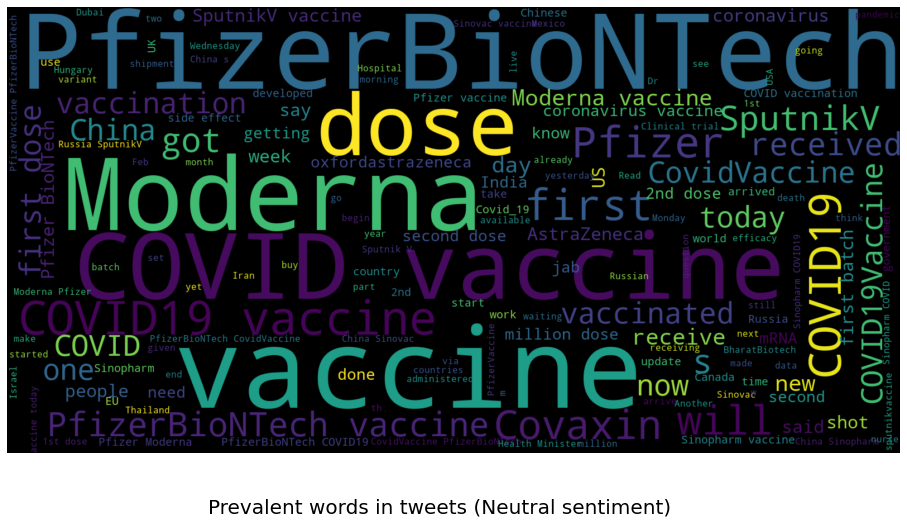

In [52]:
# Prevelant words in neutral tweets

show_wordcloud(tweets_df.loc[tweets_df['sentiment']=='Neutral', 'text'], 
               title = 'Prevalent words in tweets (Neutral sentiment)')


In [53]:
tweets_df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,datedt,year,month,day,dayofweek,hour,minute,dayofyear,date_only,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,...,2020-12-20 06:06:44,2020,12,20,6,6,6,355,2020-12-20,Positive
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,...,2020-12-13 16:27:13,2020,12,13,6,16,27,348,2020-12-13,Negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,...,2020-12-12 20:33:45,2020,12,12,5,20,33,347,2020-12-12,Positive
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,...,2020-12-12 20:23:59,2020,12,12,5,20,23,347,2020-12-12,Neutral
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,...,2020-12-12 20:17:19,2020,12,12,5,20,17,347,2020-12-12,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14688,1362771012295815172,Sputnik V,"Moscow, Russia",Sputnik V is the world’s first registered COVI...,2020-08-11 09:12:38,124471,141,355,False,2021-02-19 14:28:23,...,2021-02-19 14:28:23,2021,2,19,4,14,28,50,2021-02-19,Neutral
14689,1362769025273651201,M a r t í,США 🇺🇸,"El meu twitter en català, des dels Estats Unit...",2014-02-09 03:41:26,61,112,31,False,2021-02-19 14:20:29,...,2021-02-19 14:20:29,2021,2,19,4,14,20,50,2021-02-19,Negative
14690,1362768961914372096,AGP Limited,"Karachi, Pakistan",AGP believes in making a difference...!! \nWe ...,2018-02-01 04:24:40,116,2,13,False,2021-02-19 14:20:14,...,2021-02-19 14:20:14,2021,2,19,4,14,20,50,2021-02-19,Negative
14691,1362765451659534337,Danil Bochkov / 博奇科夫,"Moscow, Russia",IR & China expert @Russian_Council | Alumni at...,2013-07-27 07:03:28,463,469,2555,False,2021-02-19 14:06:17,...,2021-02-19 14:06:17,2021,2,19,4,14,6,50,2021-02-19,Positive


In [ ]:
tweets_df.to_csv('Tweets_Full_Set.csv', index=False)